In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [2]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../Projet_1_data/train.csv' # TODO: download train data and supply path here 
Y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

## Do your thing crazy machine learning thing here :) ...

In [3]:
from Implementations import*

## Example of method infrastructure
#### Ridge_regression

Preprocessing and parameters definition for optimization

In [16]:
y, tx, ids, tX_mean, tX_std = preprocess_data(Y, tX, ids, mean=None, std=None, param={'Build_poly': False})

seed = 1
k_fold = 4 
model = 'ridge_regression'
degrees = np.arange(4,15,1)
lambdas = np.logspace(-6,0,7)
#params = {'gamma' : 0.05, 'max_iters' : 100, 'batch_size' : 1}

Parameters optimization

In [17]:
losses_tr, losses_te, accs_tr, accs_te = params_optimization(y, tx, k_fold, model, degrees, lambdas, params = None, seed = seed, feedback = True)

Optimizing degree 4/14, model: ridge_regression, arguments: {'lambda': 1e-06}
Optimizing degree 4/14, model: ridge_regression, arguments: {'lambda': 1e-05}
Optimizing degree 4/14, model: ridge_regression, arguments: {'lambda': 0.0001}
Optimizing degree 4/14, model: ridge_regression, arguments: {'lambda': 0.001}
Optimizing degree 4/14, model: ridge_regression, arguments: {'lambda': 0.01}
Optimizing degree 4/14, model: ridge_regression, arguments: {'lambda': 0.1}
Optimizing degree 4/14, model: ridge_regression, arguments: {'lambda': 1.0}
Optimizing degree 5/14, model: ridge_regression, arguments: {'lambda': 1e-06}
Optimizing degree 5/14, model: ridge_regression, arguments: {'lambda': 1e-05}
Optimizing degree 5/14, model: ridge_regression, arguments: {'lambda': 0.0001}
Optimizing degree 5/14, model: ridge_regression, arguments: {'lambda': 0.001}
Optimizing degree 5/14, model: ridge_regression, arguments: {'lambda': 0.01}
Optimizing degree 5/14, model: ridge_regression, arguments: {'lambda

Here we optimized over 2 parameters, so we use heatmap to visualize best combination

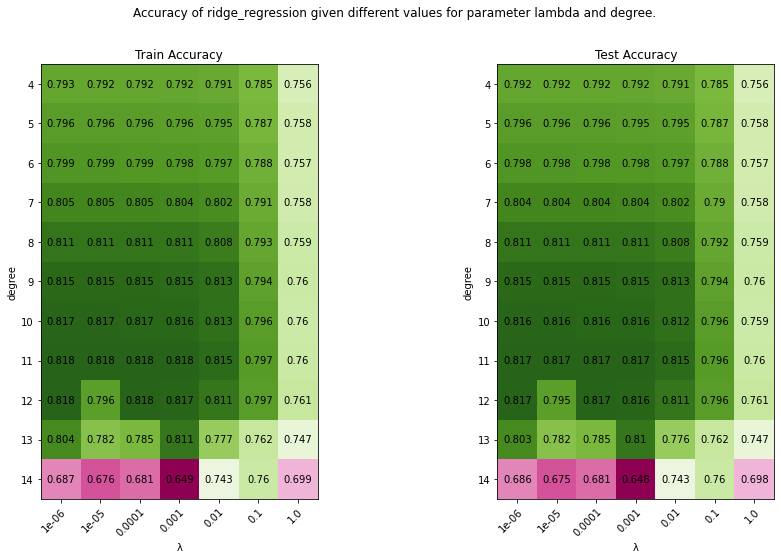

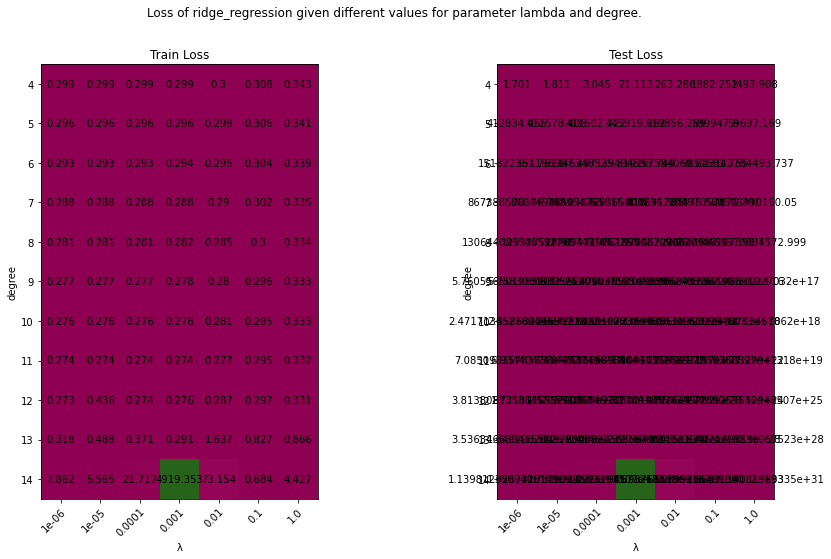

In [18]:
plot_heatmap(accs_tr, accs_te, degrees, lambdas, model, measure_type = 'Accuracy', saveimg = True, img_name = 'Heatmap_accuracy_ridge_regression')
plot_heatmap(losses_tr, losses_te, degrees, lambdas, model, measure_type = 'Loss')

Plot on MSE illustrates that this loss is not appropriate for categorization, and gets out of hand.

Manually choose best parameters

In [20]:
best_lambda = 1e-6
best_degree = 11

Compute performance on k splits with best parameters

In [24]:
model = 'ridge_regression'
seed = 1
k_fold = 6
k_indices = build_k_indices(y, k_fold, seed)
params = {'lambda' : best_lambda}

accs_te = []
losses_te = []
for k in range(k_fold):
    _, loss_te, __, acc_te = cross_validation(y, tx, k_indices, k, model, best_degree, params, feedback = True)
    accs_te.append(acc_te)
    losses_te.append(loss_te)

Starting cross-validation 1/6 for ridge_regression, extended feature of degree 11 and arguments : {'lambda': 1e-06}
Starting cross-validation 2/6 for ridge_regression, extended feature of degree 11 and arguments : {'lambda': 1e-06}
Starting cross-validation 3/6 for ridge_regression, extended feature of degree 11 and arguments : {'lambda': 1e-06}
Starting cross-validation 4/6 for ridge_regression, extended feature of degree 11 and arguments : {'lambda': 1e-06}
Starting cross-validation 5/6 for ridge_regression, extended feature of degree 11 and arguments : {'lambda': 1e-06}
Starting cross-validation 6/6 for ridge_regression, extended feature of degree 11 and arguments : {'lambda': 1e-06}


Store values for later

In [25]:
np.save('best_models_perf/best_accs_' + model, accs_te)
np.save('best_models_perf/best_losses_' + model, losses_te)

## Generate predictions and save ouput in csv format for submission:

In [10]:
DATA_TEST_PATH = '' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [31]:
OUTPUT_PATH = '' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)